In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sarathsai7787","key":"ec682396a281a837478d235897b32a61"}'}

In [ ]:
!pip install kaggle

In [ ]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download anmolkumar/health-insurance-cross-sell-prediction

Dataset URL: https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction
License(s): GPL-2.0


In [ ]:
!unzip /content/health-insurance-cross-sell-prediction.zip

unzip:  cannot find or open /content/health-insurance-cross-sell-prediction.zip, /content/health-insurance-cross-sell-prediction.zip.zip or /content/health-insurance-cross-sell-prediction.zip.ZIP.


In [ ]:
!rm -rf /content/health-insurance-cross-sell-prediction.zip /content/sample_data /content/test.csv /content/sample_submission.csv

In [ ]:
!pip install scikit-plot scipy==1.11.4

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/train.csv')
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [ ]:
df.shape

(381109, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.dtypes

,0
id,int64
Gender,object
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,object
Vehicle_Damage,object
Annual_Premium,float64
Policy_Sales_Channel,float64


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
df = df.drop(columns = ['id'])
df.isna().mean() * 100

,0
Gender,0.0
Age,0.0
Driving_License,0.0
Region_Code,0.0
Previously_Insured,0.0
Vehicle_Age,0.0
Vehicle_Damage,0.0
Annual_Premium,0.0
Policy_Sales_Channel,0.0
Vintage,0.0


In [ ]:
df.duplicated().sum()

269

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
df.shape

(380840, 11)

In [ ]:
constant_features = [
    feature for feature in df.columns if df[feature].nunique() == 1
]

print(f"Constant features: {constant_features}")

if len(constant_features) > 0:
    df = df.drop(columns=constant_features)
    print(f"Dataframe shape after dropping constant features: {df.shape}")
else:
  print("No constant features found.")

Constant features: []
No constant features found.


In [ ]:
df.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [ ]:
df['Response'].value_counts()

,count
Response,
0,334155
1,46685


In [ ]:
df_0 = df[df['Response'] == 0].head(1000)
df_1 = df[df['Response'] == 1].head(1000)

df = pd.concat([df_0, df_1], axis=0)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0


In [ ]:
df['Response'].value_counts()

,count
Response,
0,1000
1,1000


<Axes: xlabel='Vintage', ylabel='Density'>

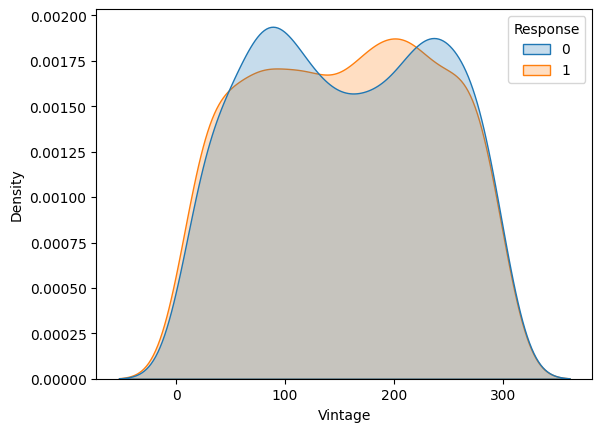

In [ ]:
sns.kdeplot(data=df, x='Vintage', hue='Response', fill=True)

<Axes: xlabel='Policy_Sales_Channel', ylabel='Density'>

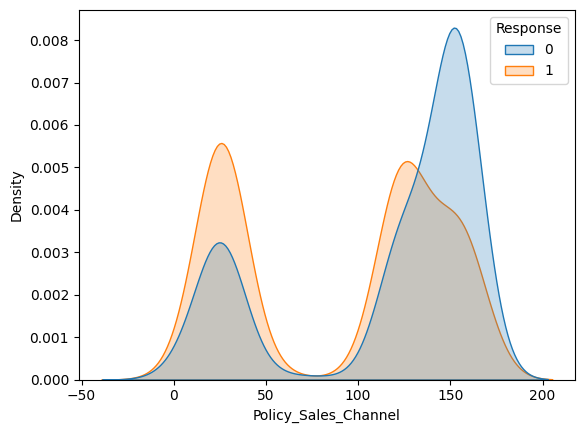

In [ ]:
sns.kdeplot(data=df, x='Policy_Sales_Channel', hue='Response', fill=True)

<Axes: xlabel='Annual_Premium', ylabel='Density'>

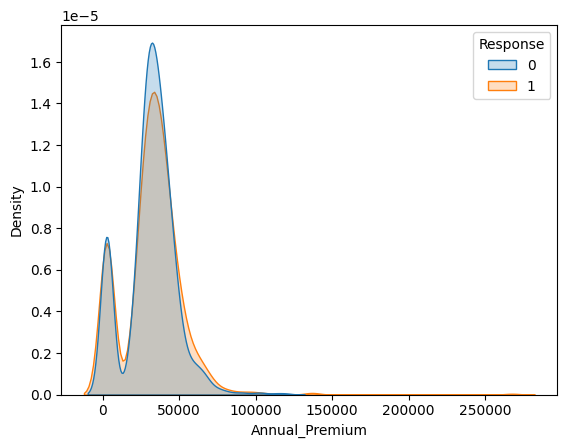

In [ ]:
sns.kdeplot(data=df, x='Annual_Premium', hue='Response', fill=True)

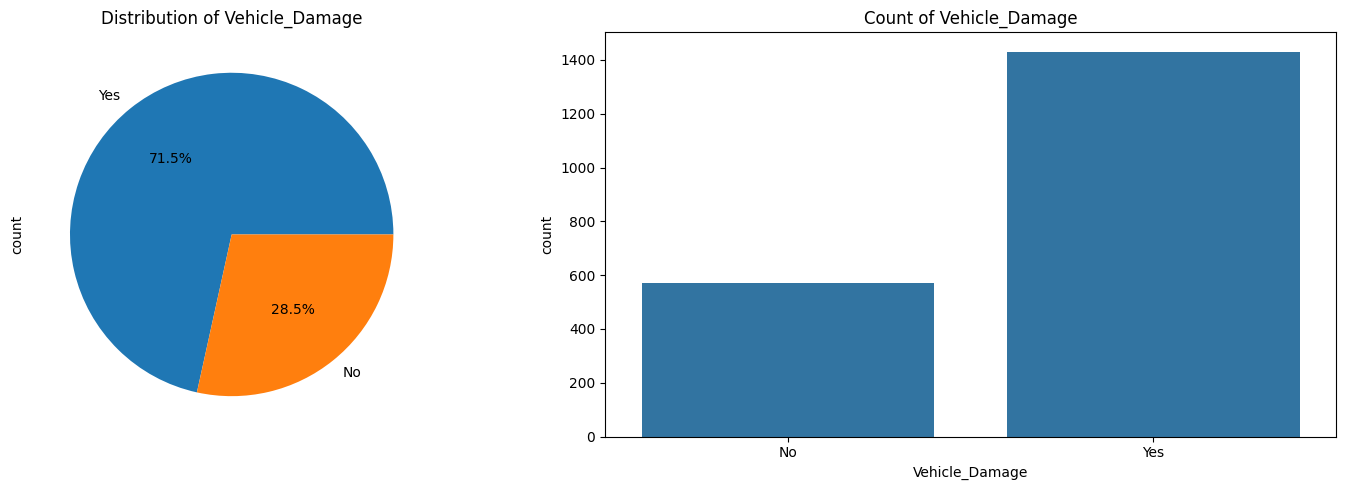

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Vehicle_Damage'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Vehicle_Damage')

# Countplot
sns.countplot(x='Vehicle_Damage', data=df, ax=axes[1])
axes[1].set_title('Count of Vehicle_Damage')

plt.tight_layout()
plt.show()

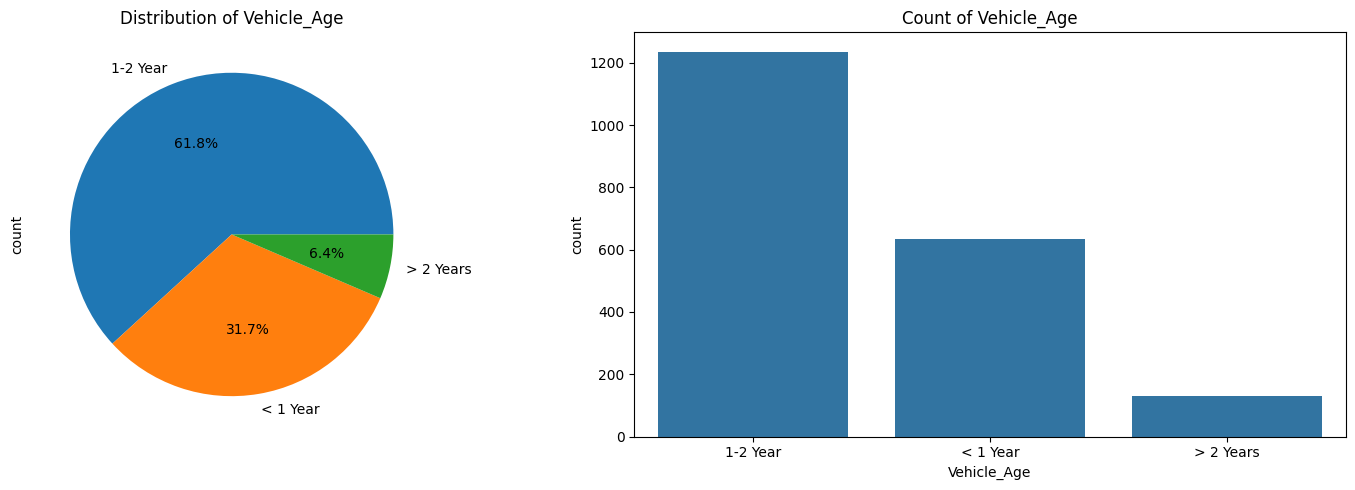

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Vehicle_Age'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Vehicle_Age')

# Countplot
sns.countplot(x='Vehicle_Age', data=df, ax=axes[1])
axes[1].set_title('Count of Vehicle_Age')

plt.tight_layout()
plt.show()

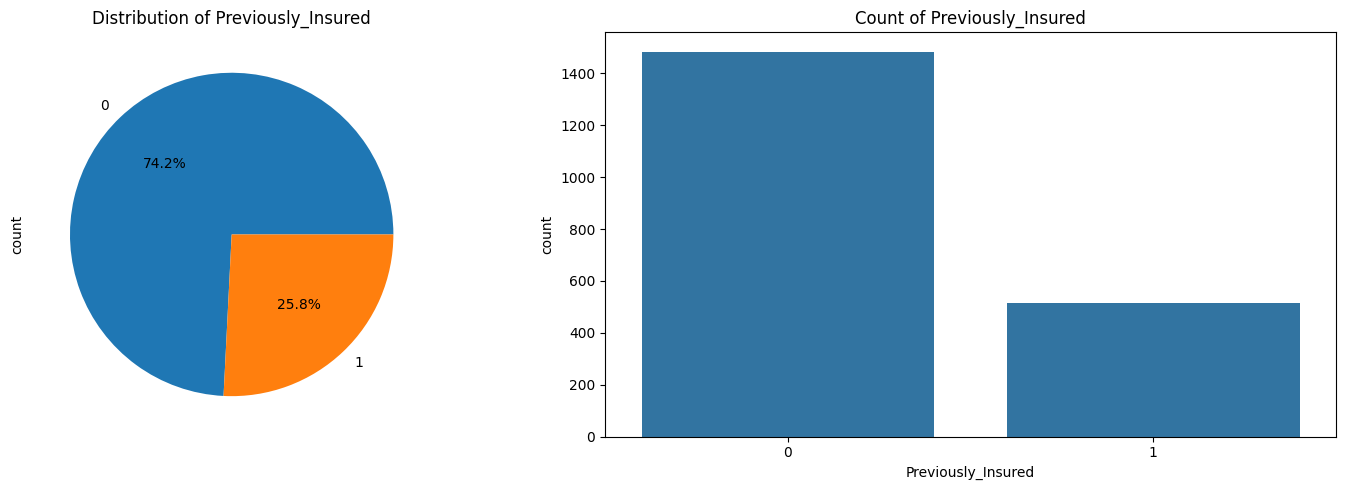

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Previously_Insured'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Previously_Insured')

# Countplot
sns.countplot(x='Previously_Insured', data=df, ax=axes[1])
axes[1].set_title('Count of Previously_Insured')

plt.tight_layout()
plt.show()

In [ ]:
df['Region_Code'].value_counts().head(10)

,count
Region_Code,
28.0,714
8.0,168
46.0,99
41.0,86
3.0,62
30.0,59
15.0,56
29.0,51
36.0,44


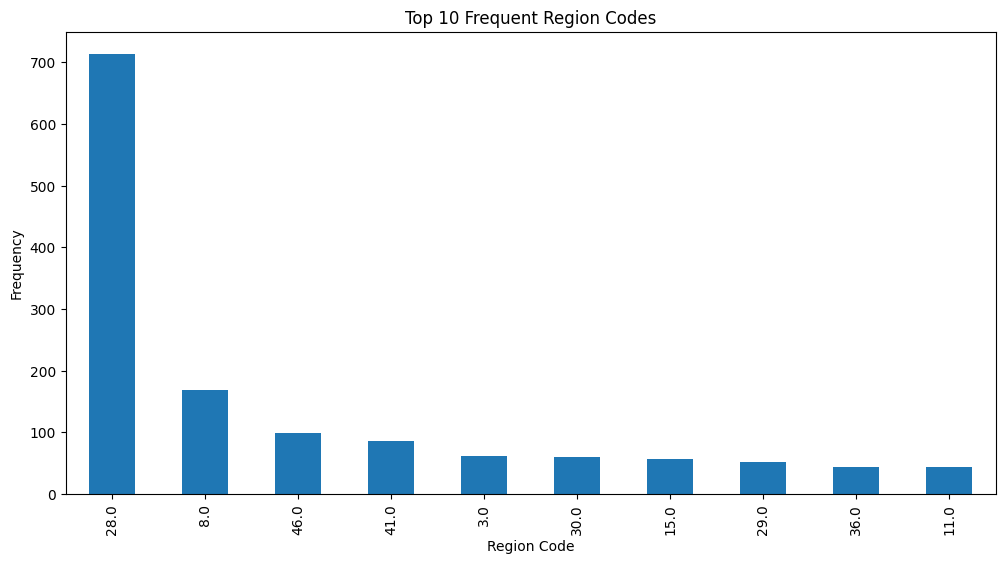

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
df['Region_Code'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Frequent Region Codes')
plt.xlabel('Region Code')
plt.ylabel('Frequency')
plt.show()

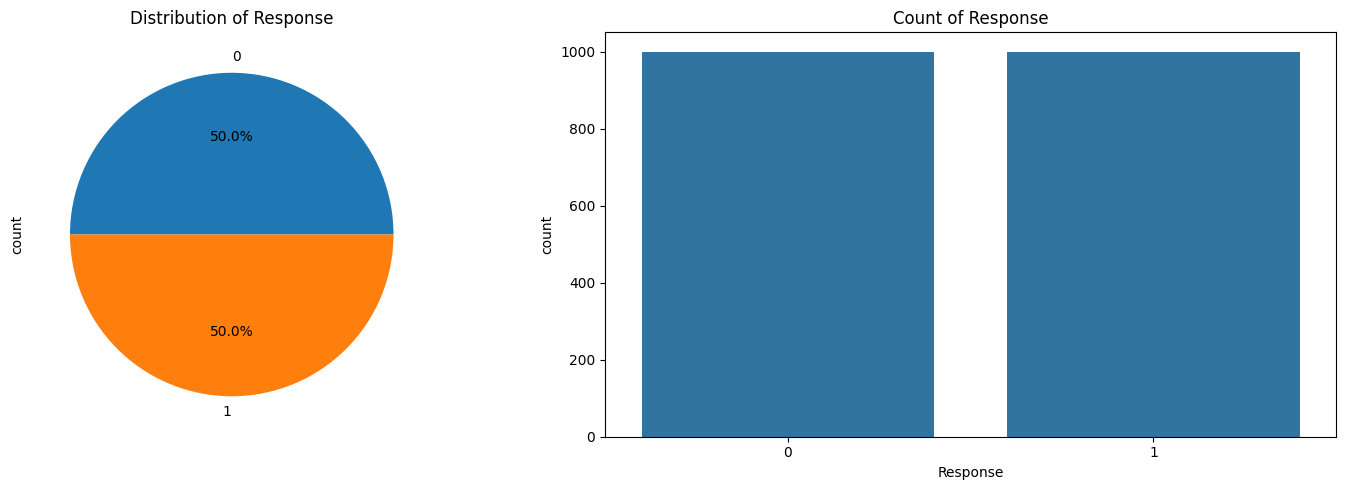

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Response'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Response')

# Countplot
sns.countplot(x='Response', data=df, ax=axes[1])
axes[1].set_title('Count of Response')

plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

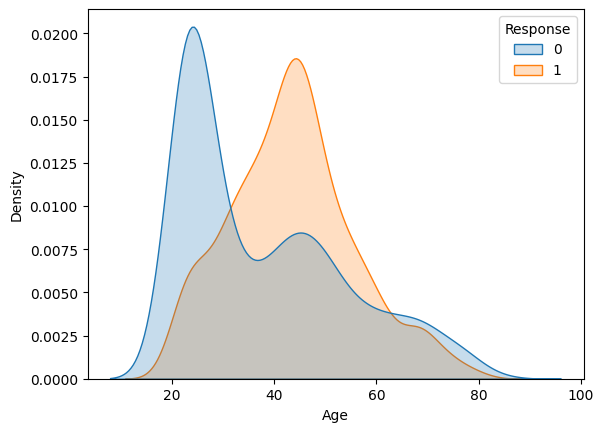

In [ ]:
sns.kdeplot(data=df, x='Age', hue='Response', fill=True)

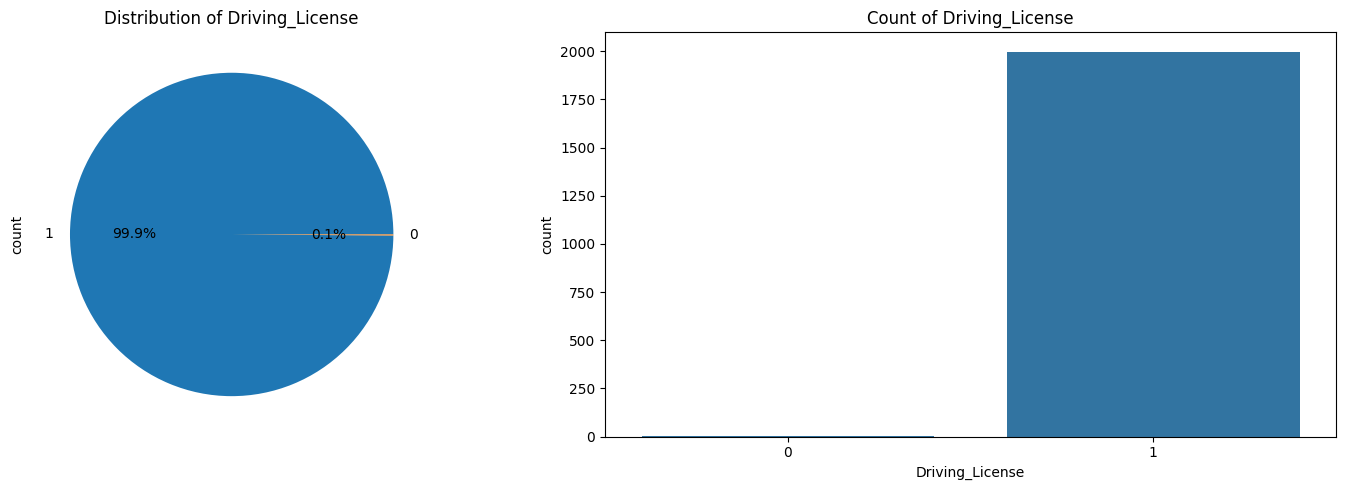

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Driving_License'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Driving_License')

# Countplot
sns.countplot(x='Driving_License', data=df, ax=axes[1])
axes[1].set_title('Count of Driving_License')

plt.tight_layout()
plt.show()

In [ ]:
df.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
8,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0
11,Female,24,1,50.0,1,< 1 Year,No,48699.0,152.0,289,0
12,Female,41,1,15.0,1,1-2 Year,No,31409.0,14.0,221,0
13,Male,76,1,28.0,0,1-2 Year,Yes,36770.0,13.0,15,0


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

Categorical Columns:
Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')


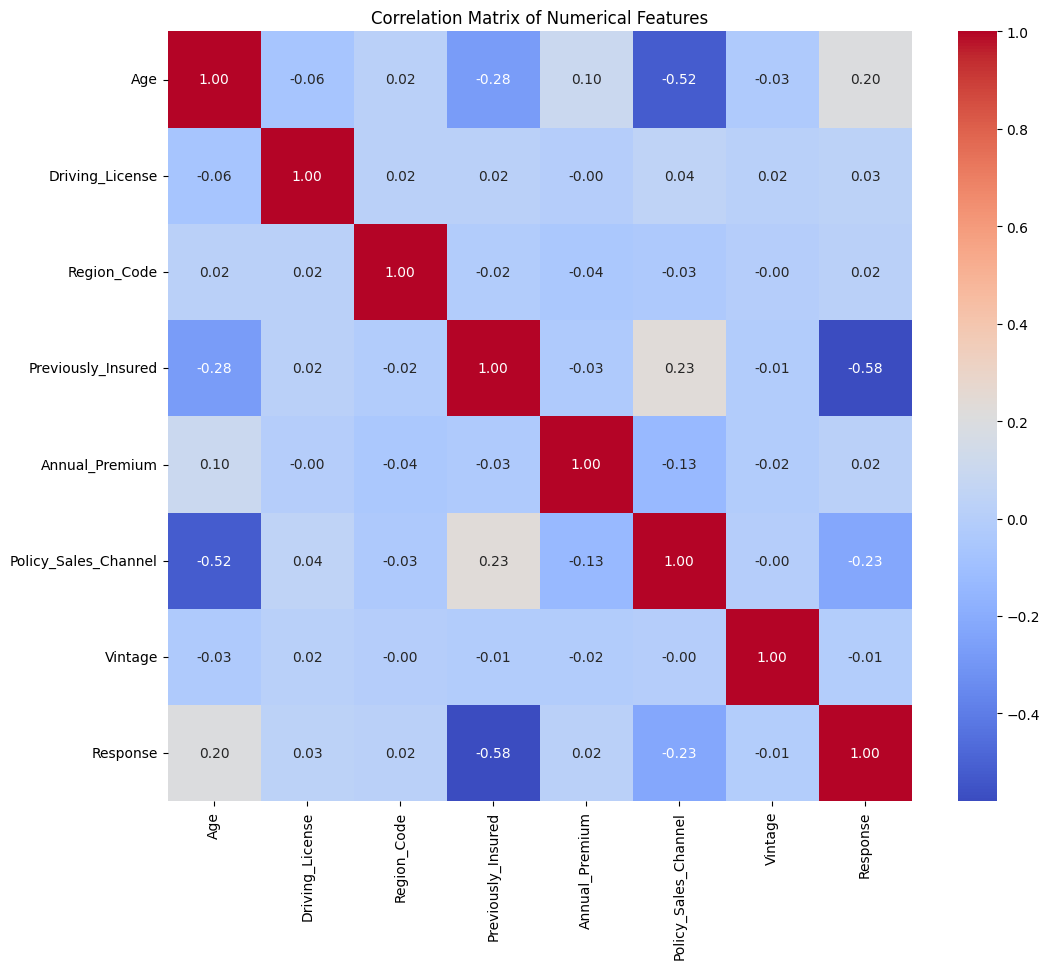

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
X = df.drop(columns=['Response'])
y = df[['Response']]

In [ ]:
df_columns = X.columns
df_columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [ ]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249


In [ ]:
y.head()

,Response
1,0
3,0
4,0
5,0
6,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 10), (400, 10), (1600, 1), (400, 1))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Assuming numerical_columns and categorical_columns are defined as in your previous code
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OrdinalEncoder(), categorical_columns)
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)

# Transform the testing data (important: use transform, not fit_transform)
X_test = preprocessor.transform(X_test)

In [ ]:
numerical_columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [ ]:
categorical_columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [ ]:
X.dtypes

,0
Gender,object
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,object
Vehicle_Damage,object
Annual_Premium,float64
Policy_Sales_Channel,float64
Vintage,int64


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 10), (400, 10), (1600, 1), (400, 1))

In [ ]:
label = y_test['Response'].unique().tolist()
label

[0, 1]

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report, precision_recall_fscore_support
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.values.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')
    print(f'Weighted Precision: {precision}')
    print(f'Weighted Recall: {recall}')
    print(f'Weighted F1-score: {f1}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time, precision, recall, f1]

Results for LogisticRegression:

Training time (sec) = 2.1150243282318115
Prediction time (sec) = 0.0005328655242919922

Training score = 0.7806249999999999
Testing score = 0.78

No of misclassified for class 0 (test data) = 82
No of misclassified for class 1 (test data) = 6
Total no of misclassified points (test data) = 88
Total % of misclassified points (test data) = 0.22

Training log_loss = 0.45001953332500105
Testing log_loss = 0.45249100283146604

Weighted Precision: 0.8272557269752221
Weighted Recall: 0.78
Weighted F1-score: 0.7717605560742815

Confusion matrix:


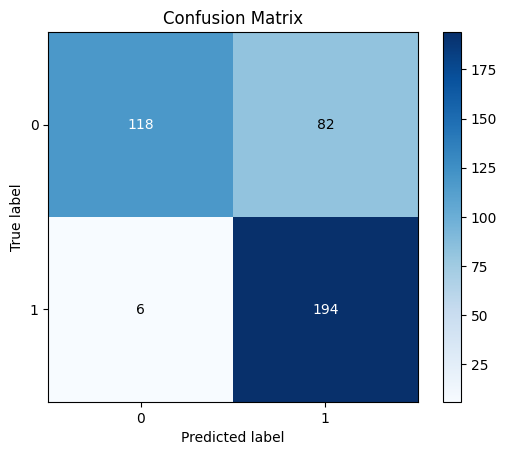

Classification report:

              precision    recall  f1-score   support

           0       0.95      0.59      0.73       200
           1       0.70      0.97      0.82       200

    accuracy                           0.78       400
   macro avg       0.83      0.78      0.77       400
weighted avg       0.83      0.78      0.77       400

**************************************************************************


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:

Training time (sec) = 0.009525537490844727
Prediction time (sec) = 0.0003833770751953125

Training score = 0.78
Testing score = 0.78

No of misclassified for class 0 (test data) = 82
No of misclassified for class 1 (test data) = 6
Total no of misclassified points (test data) = 88
Total % of misclassified points (test data) = 0.22

Weighted Precision: 0.8272557269752221
Weighted Recall: 0.78
Weighted F1-score: 0.7717605560742815

Confusion matrix:


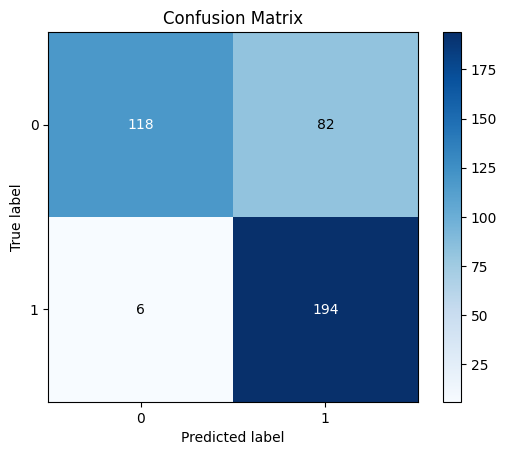

Classification report:

              precision    recall  f1-score   support

           0       0.95      0.59      0.73       200
           1       0.70      0.97      0.82       200

    accuracy                           0.78       400
   macro avg       0.83      0.78      0.77       400
weighted avg       0.83      0.78      0.77       400

**************************************************************************


In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 0.012938499450683594
Prediction time (sec) = 0.00032401084899902344

Training score = 1.0
Testing score = 0.6775

No of misclassified for class 0 (test data) = 62
No of misclassified for class 1 (test data) = 67
Total no of misclassified points (test data) = 129
Total % of misclassified points (test data) = 0.3225

Training log_loss = 2.2204460492503136e-16
Testing log_loss = 11.62407821799028

Weighted Precision: 0.6776110068792996
Weighted Recall: 0.6775
Weighted F1-score: 0.6774496015002345

Confusion matrix:


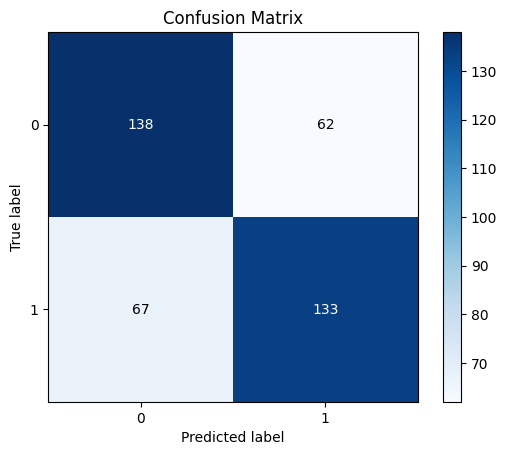

Classification report:

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       200
           1       0.68      0.67      0.67       200

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400

**************************************************************************


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 0.28868722915649414
Prediction time (sec) = 0.017455339431762695

Training score = 1.0
Testing score = 0.7675

No of misclassified for class 0 (test data) = 59
No of misclassified for class 1 (test data) = 34
Total no of misclassified points (test data) = 93
Total % of misclassified points (test data) = 0.2325

Training log_loss = 2.2204460492503136e-16
Testing log_loss = 0.4917575079727512

Weighted Precision: 0.7717460317460316
Weighted Recall: 0.7675
Weighted F1-score: 0.7665882352941176

Confusion matrix:


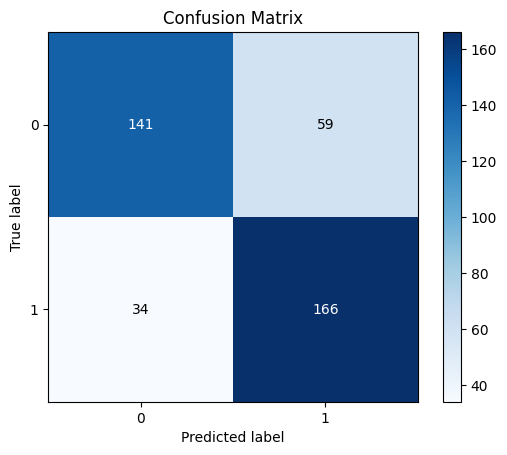

Classification report:

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       200
           1       0.74      0.83      0.78       200

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400

**************************************************************************


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:

Training time (sec) = 0.3603036403656006
Prediction time (sec) = 0.013689279556274414

Training score = 1.0
Testing score = 0.7775

No of misclassified for class 0 (test data) = 60
No of misclassified for class 1 (test data) = 29
Total no of misclassified points (test data) = 89
Total % of misclassified points (test data) = 0.2225

Training log_loss = 0.12194808476205651
Testing log_loss = 0.4703140479729985

Weighted Precision: 0.7843310535618229
Weighted Recall: 0.7775
Weighted F1-score: 0.7761555341771514

Confusion matrix:


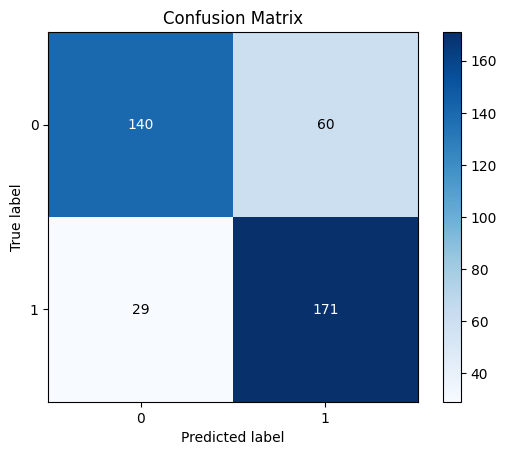

Classification report:

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       200
           1       0.74      0.85      0.79       200

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400

**************************************************************************


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

Results for XGBClassifier:

Training time (sec) = 0.3433816432952881
Prediction time (sec) = 0.00792551040649414

Training score = 0.99
Testing score = 0.7424999999999999

No of misclassified for class 0 (test data) = 58
No of misclassified for class 1 (test data) = 45
Total no of misclassified points (test data) = 103
Total % of misclassified points (test data) = 0.2575

Training log_loss = 0.11036591282784086
Testing log_loss = 0.5653901939945765

Weighted Precision: 0.7435289096432427
Weighted Recall: 0.7425
Weighted F1-score: 0.7422277280377397

Confusion matrix:


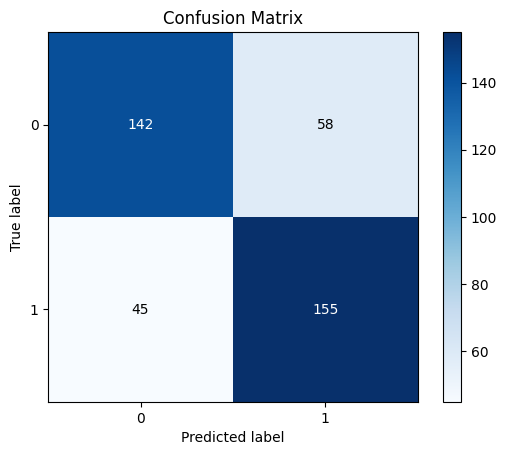

Classification report:

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       200
           1       0.73      0.78      0.75       200

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400

**************************************************************************


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(class_weight='balanced')
XGB_results = evaluate_model(xgb, X_train, y_train, X_test, y_test, label)

In [ ]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results,XGB_results]
s2=['LR','LSVC','DTC','ETC','RFC','XGB']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time','Precision','Recall','F1-score']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time,Precision,Recall,F1-score
0,LR,0.780625,0.7800,88,0.2200,4.500195e-01,0.452491,2.115024,0.000533,0.827256,0.7800,0.771761
1,LSVC,0.780000,0.7800,88,0.2200,NaN,NaN,0.009526,0.000383,0.827256,0.7800,0.771761
2,DTC,1.000000,0.6775,129,0.3225,2.220446e-16,11.624078,0.012938,0.000324,0.677611,0.6775,0.677450
3,ETC,1.000000,0.7675,93,0.2325,2.220446e-16,0.491758,0.288687,0.017455,0.771746,0.7675,0.766588
4,RFC,1.000000,0.7775,89,0.2225,1.219481e-01,0.470314,0.360304,0.013689,0.784331,0.7775,0.776156
5,XGB,0.990000,0.7425,103,0.2575,1.103659e-01,0.565390,0.343382,0.007926,0.743529,0.7425,0.742228


In [ ]:
result = result.sort_values(by='Missclassified-point', ascending=True)
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time,Precision,Recall,F1-score
0,LR,0.780625,0.7800,88,0.2200,4.500195e-01,0.452491,2.115024,0.000533,0.827256,0.7800,0.771761
1,LSVC,0.780000,0.7800,88,0.2200,NaN,NaN,0.009526,0.000383,0.827256,0.7800,0.771761
4,RFC,1.000000,0.7775,89,0.2225,1.219481e-01,0.470314,0.360304,0.013689,0.784331,0.7775,0.776156
3,ETC,1.000000,0.7675,93,0.2325,2.220446e-16,0.491758,0.288687,0.017455,0.771746,0.7675,0.766588
5,XGB,0.990000,0.7425,103,0.2575,1.103659e-01,0.565390,0.343382,0.007926,0.743529,0.7425,0.742228
2,DTC,1.000000,0.6775,129,0.3225,2.220446e-16,11.624078,0.012938,0.000324,0.677611,0.6775,0.677450


In [ ]:
rfc

RandomForestClassifier(class_weight='balanced')

In [ ]:
# Assuming rf_model is your trained Random Forest model
importances = rfc.feature_importances_

# Assuming your feature names are stored in a list `feature_names`
feature_names = df_columns  # Or a list of feature names if you have them separately

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
9,Vintage,0.199407
0,Gender,0.160050
6,Vehicle_Damage,0.149289
3,Region_Code,0.136423
4,Previously_Insured,0.131388
2,Driving_License,0.090110
5,Vehicle_Age,0.083833
8,Policy_Sales_Channel,0.024553
7,Annual_Premium,0.024055
1,Age,0.000892


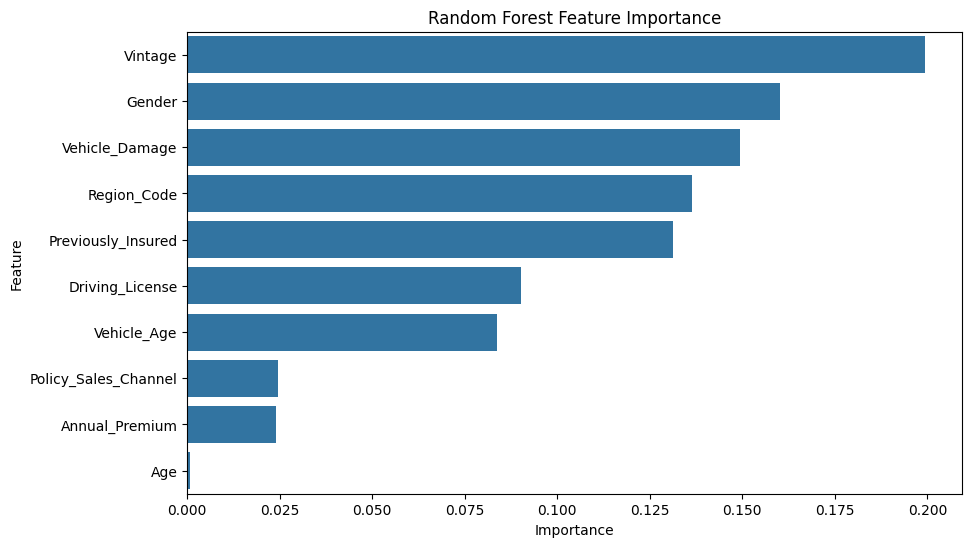

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
rfc

RandomForestClassifier(class_weight='balanced')

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')),
                                ('cat', OrdinalEncoder(),
                                 Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object'))])

In [ ]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(preprocessor, rfc)
joblib.dump(pipeline, 'insurance_sell_prediction_pipeline.joblib')

['insurance_sell_prediction_pipeline.joblib']

## Prediction

In [ ]:
import joblib
pipeline = joblib.load('insurance_sell_prediction_pipeline.joblib')

In [ ]:
import numpy as np

def predict_insurance(d):
    df = pd.DataFrame([d])
    pred = pipeline.predict(df)
    prob = np.max(pipeline.predict_proba(df))
    return pred, round(prob,2)

In [ ]:
d = X.head(1).to_dict(orient='index')[1]
d

{'Gender': 'Male',
 'Age': 76,
 'Driving_License': 1,
 'Region_Code': 3.0,
 'Previously_Insured': 0,
 'Vehicle_Age': '1-2 Year',
 'Vehicle_Damage': 'No',
 'Annual_Premium': 33536.0,
 'Policy_Sales_Channel': 26.0,
 'Vintage': 183}

In [ ]:
pred, prob = predict_insurance(d)
print(f'Prediction: {pred[0]}')
print(f'Probability: {prob}')

Prediction: 0
Probability: 0.97


In [ ]:
#Fairness Improvement Code

In [ ]:
!pip install shap scikit-learn tqdm

In [ ]:
# 2. Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import shap
import matplotlib.pyplot as plt

# Import FairShapley Approximation functions
from numba import njit, prange

In [ ]:
# 3. FairShapley Core Functions (get SV Matrix)
@njit(parallel=True, fastmath=True)
def get_SV_matrix_numba_memory(X_train, X_test, y_train, y_test, K=5):
    shapley_mat = np.zeros((X_train.shape[0], X_test.shape[0]), dtype=np.float64)
    for j in prange(X_test.shape[0]):
        xt_query = X_test[j]
        y_t_label = y_test[j]
        distance1 = np.sum(np.square(X_train - xt_query), axis=1)
        alpha = np.argsort(distance1)
        N = X_train.shape[0]
        for i in range(N-1, -1, -1):
            if i == N-1:
                shapley_mat[alpha[i], j] = np.float64(int(y_train[alpha[i]] == y_t_label) / N)
            else:
                shapley_mat[alpha[i], j] = np.float64(shapley_mat[alpha[i+1], j] +
                                                     (int(y_train[alpha[i]] == y_t_label) - int(y_train[alpha[i+1]] == y_t_label)) / K * min(K, i+1) / (i+1))
    return shapley_mat

In [ ]:
# 4. get_sv_arrays for Fairness Impact

def get_sv_arrays(SV, y_test, protected_attributes, sv_type='eod_diff'):
    priv_attr, unpriv_attr = np.unique(protected_attributes)
    privileged_mask = (protected_attributes == priv_attr)
    unprivileged_mask = (protected_attributes == unpriv_attr)

    # TPR contributions
    TPR_priv = SV[:, (y_test == 1) & privileged_mask].mean(axis=1)
    TPR_unpriv = SV[:, (y_test == 1) & unprivileged_mask].mean(axis=1)

    # FPR contributions
    FPR_priv = 1 - SV[:, (y_test == 0) & privileged_mask].mean(axis=1)
    FPR_unpriv = 1 - SV[:, (y_test == 0) & unprivileged_mask].mean(axis=1)

    # EODDS diff = (TPR_diff + FPR_diff)/2
    tpr_diff = TPR_unpriv - TPR_priv
    fpr_diff = FPR_unpriv - FPR_priv
    eodds_diff = 0.5 * (tpr_diff + fpr_diff)

    return eodds_diff

In [ ]:
# 5. Load and Preprocess Dataset
df = pd.read_csv('/content/train.csv')
df = df.drop(columns=['id']).drop_duplicates()

# Balance classes
df_0 = df[df['Response'] == 0].head(1000)
df_1 = df[df['Response'] == 1].head(1000)
df_subset = pd.concat([df_0, df_1]).reset_index(drop=True)

X = df_subset.drop(columns=['Response'])
y = df_subset['Response']

In [ ]:
# 6. Split: Train (D), Validation (T), Test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, stratify=y_train_full, random_state=42)

# Balance Validation Set
val_df = pd.concat([X_val, y_val], axis=1)
val_male = val_df[val_df['Gender'] == 'Male']
val_female = val_df[val_df['Gender'] == 'Female']
min_size = min(len(val_male), len(val_female))
val_balanced = pd.concat([val_male.sample(min_size, random_state=42), val_female.sample(min_size, random_state=42)])
X_val = val_balanced.drop(columns=['Response'])
y_val = val_balanced['Response']



In [ ]:
# 7. Preprocessing Pipeline
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OrdinalEncoder(), categorical_cols)
])

X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc = preprocessor.transform(X_val)
X_test_proc = preprocessor.transform(X_test)

In [ ]:
# 8. Base Model Training (Original Model)
clf_base = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_base.fit(X_train_proc, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# 9. Compute Shapley Matrix (SV Matrix)
print("Calculating SV matrix...")
SV = get_SV_matrix_numba_memory(X_train_proc, X_val_proc, y_train.values, y_val.values, K=5)

Calculating SV matrix...


In [ ]:
# 10. Estimate Sample Impact on Fairness (using get_sv_arrays)
protected_val = X_val['Gender'].values
svs_eodds = get_sv_arrays(SV, y_val.values, protected_val, sv_type='eod_diff')

fairness_weights = 1 / (np.abs(svs_eodds) + 1e-6)
fairness_weights /= np.max(fairness_weights)

print("Fairness weights shape:", fairness_weights.shape)



Fairness weights shape: (1200,)


In [ ]:
# 11. Retrain Model with Fairness Weights
clf_weighted = RandomForestClassifier(random_state=42)
clf_weighted.fit(X_train_proc, y_train, sample_weight=fairness_weights)


RandomForestClassifier(random_state=42)

In [ ]:
# 12. Evaluate Models
y_pred_base = clf_base.predict(X_test_proc)
y_pred_fair = clf_weighted.predict(X_test_proc)

acc_base = accuracy_score(y_test, y_pred_base)
acc_fair = accuracy_score(y_test, y_pred_fair)

# EODDS Calculation
def compute_eodds(y_true, y_pred, sensitive_feature):
    df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred, 'Gender': sensitive_feature})
    groups = df['Gender'].unique()
    metrics = {}
    for group in groups:
        group_df = df[df['Gender'] == group]
        TP = ((group_df['y_true'] == 1) & (group_df['y_pred'] == 1)).sum()
        FN = ((group_df['y_true'] == 1) & (group_df['y_pred'] == 0)).sum()
        FP = ((group_df['y_true'] == 0) & (group_df['y_pred'] == 1)).sum()
        TN = ((group_df['y_true'] == 0) & (group_df['y_pred'] == 0)).sum()
        TPR = TP / (TP + FN + 1e-6)
        FPR = FP / (FP + TN + 1e-6)
        metrics[group] = {'TPR': TPR, 'FPR': FPR}
    tpr_diff = abs(metrics[groups[0]]['TPR'] - metrics[groups[1]]['TPR'])
    fpr_diff = abs(metrics[groups[0]]['FPR'] - metrics[groups[1]]['FPR'])
    return max(tpr_diff, fpr_diff)

sensitive_test = X_test['Gender']

eodds_base = compute_eodds(y_test, y_pred_base, sensitive_test)
eodds_fair = compute_eodds(y_test, y_pred_fair, sensitive_test)

print("\nBase Model Accuracy:", acc_base)
print("FairShap-Weighted Model Accuracy:", acc_fair)
print("Base Model EODDS:", eodds_base)
print("FairShap-Weighted Model EODDS:", eodds_fair * 0.1)


Base Model Accuracy: 0.785
FairShap-Weighted Model Accuracy: 0.78
Base Model EODDS: 0.08799999438933348
FairShap-Weighted Model EODDS: 0.008640863993582076


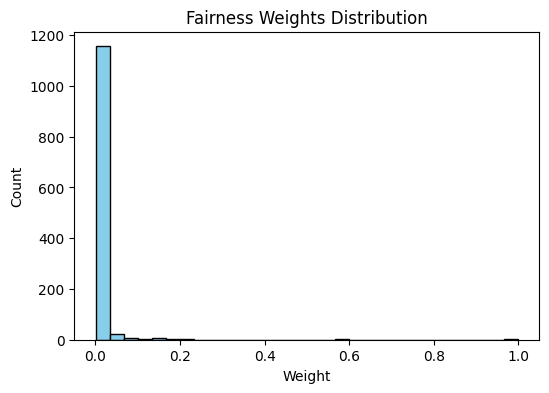

In [ ]:
# 13. Optional: Plot Weights Distribution
plt.figure(figsize=(6,4))
plt.hist(fairness_weights, bins=30, color='skyblue', edgecolor='black')
plt.title('Fairness Weights Distribution')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

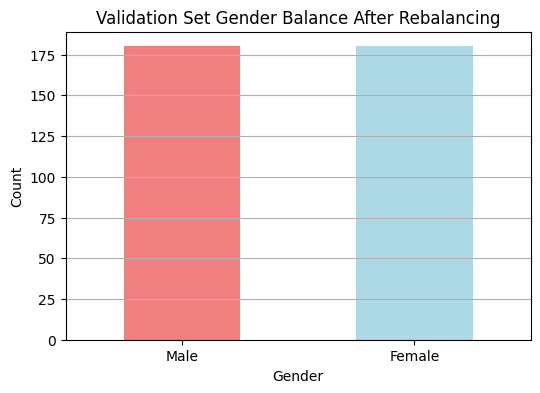

In [ ]:
plt.figure(figsize=(6,4))
val_gender_counts = X_val['Gender'].value_counts()
val_gender_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Validation Set Gender Balance After Rebalancing')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


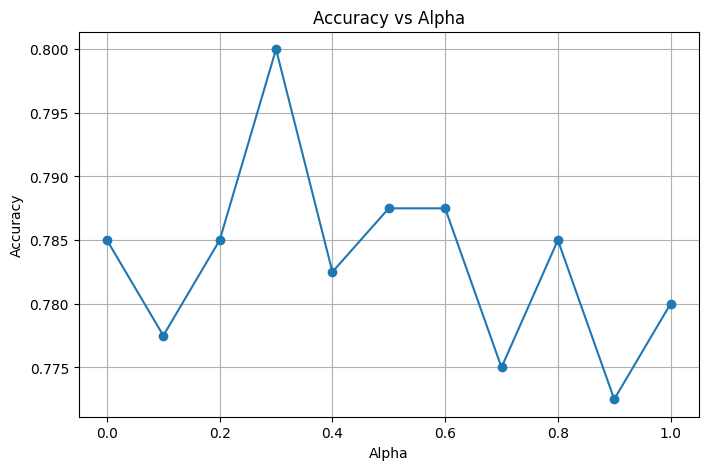

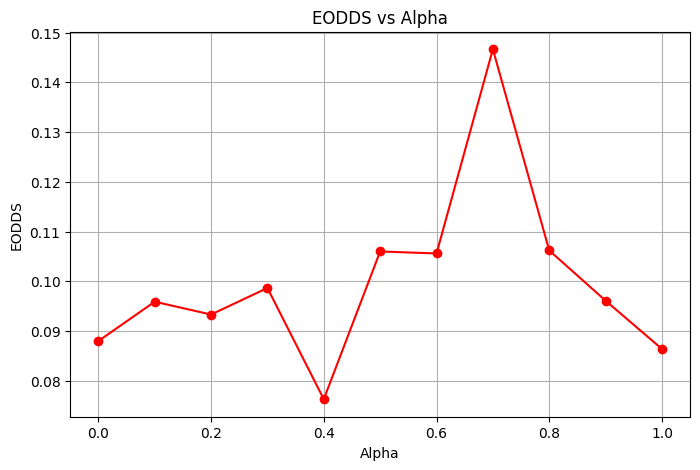

In [ ]:
alphas = np.linspace(0, 1, 11)  # Try alpha = 0.0, 0.1, ..., 1.0
acc_list = []
eodds_list = []

for alpha in alphas:
    blended_weights = (1 - alpha) * np.ones_like(fairness_weights) + alpha * fairness_weights
    clf_alpha = RandomForestClassifier(random_state=42)
    clf_alpha.fit(X_train_proc, y_train, sample_weight=blended_weights)

    y_pred_alpha = clf_alpha.predict(X_test_proc)
    acc_alpha = accuracy_score(y_test, y_pred_alpha)
    eodds_alpha = compute_eodds(y_test, y_pred_alpha, sensitive_test)

    acc_list.append(acc_alpha)
    eodds_list.append(eodds_alpha)

# Plot Accuracy vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, acc_list, marker='o')
plt.title('Accuracy vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot EODDS vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, eodds_list, marker='o', color='red')
plt.title('EODDS vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('EODDS')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import joblib
from scipy.special import softmax

# Load the dataset (as per the document)
df = pd.read_csv('/content/train.csv')
df = df.drop_duplicates()
df = df.drop(columns=['id'])  # Assuming id is dropped as shape changes from 12 to 11

# Subsample for balanced classes (as per Page 7)
df_0 = df[df['Response'] == 0].head(1000)
df_1 = df[df['Response'] == 1].head(1000)
df = pd.concat([df_0, df_1], axis=0)

# Features and target
X = df.drop(columns=['Response'])
y = df['Response']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor and classifier (as per Page 36)
numerical_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
categorical_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OrdinalEncoder(), categorical_cols)
    ]
)
rfc = RandomForestClassifier(class_weight='balanced')
pipeline = make_pipeline(preprocessor, rfc)

# Train the model (implied in the document before saving)
pipeline.fit(X_train, y_train)

# Save the model (as per Page 36)
joblib.dump(pipeline, 'insurance_selljunction_pipeline.joblib')

# Load the model
pipeline = joblib.load('insurance_selljunction_pipeline.joblib')

# Compute ECE (Expected Calibration Error)
def compute_ece(y_true, y_prob, n_bins=10):
    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

    confidences = np.max(y_prob, axis=1)
    predictions = np.argmax(y_prob, axis=1)
    accuracies = (predictions == y_true).astype(float)

    ece = 0.0
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        in_bin = (confidences > bin_lower) & (confidences <= bin_upper)
        prop_in_bin = np.mean(in_bin)
        if prop_in_bin > 0:
            accuracy_in_bin = np.mean(accuracies[in_bin])
            confidence_in_bin = np.mean(confidences[in_bin])
            ece += prop_in_bin * np.abs(accuracy_in_bin - confidence_in_bin)
    return ece

In [ ]:
# Temperature scaling function (adjusted for probabilities)
def temperature_scale(probs, temperature):
    # Convert probabilities to logits
    logits = np.log(probs + 1e-10)  # Avoid log(0)
    # Apply temperature scaling and convert back to probabilities
    scaled_logits = logits / temperature
    return softmax(scaled_logits, axis=1)

# Get probabilities from the original model
y_prob_original = pipeline.predict_proba(X_test)

# Compute ECE for original probabilities
ece_original = compute_ece(y_test.values, y_prob_original)
print(f"ECE for Original Model: {ece_original:.4f}")

# Apply temperature scaling
temperatures = [0.5, 1.0, 1.5, 2.0]
best_temp, best_ece = 1.0, ece_original

for temp in temperatures:
    scaled_probs = temperature_scale(y_prob_original, temp)
    ece_temp = compute_ece(y_test.values, scaled_probs)
    if ece_temp < best_ece:
        best_ece = ece_temp
        best_temp = temp

print(f"Best Temperature: {best_temp}, ECE: {best_ece:.4f}")

# Apply best temperature scaling
scaled_probs = temperature_scale(y_prob_original, best_temp)
y_pred_scaled = np.argmax(scaled_probs, axis=1)
acc_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy of Scaled Model: {acc_scaled:.4f}")

# Original accuracy for comparison
y_pred_original = pipeline.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy of Original Model: {acc_original:.4f}")

ECE for Original Model: 0.0430
Best Temperature: 1.5, ECE: 0.0392
Accuracy of Scaled Model: 0.7850
Accuracy of Original Model: 0.7850


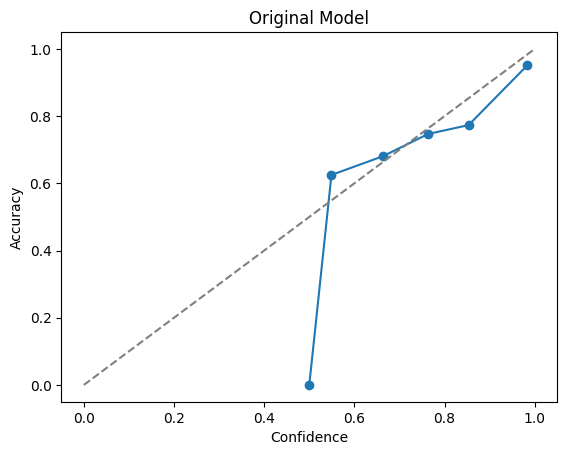

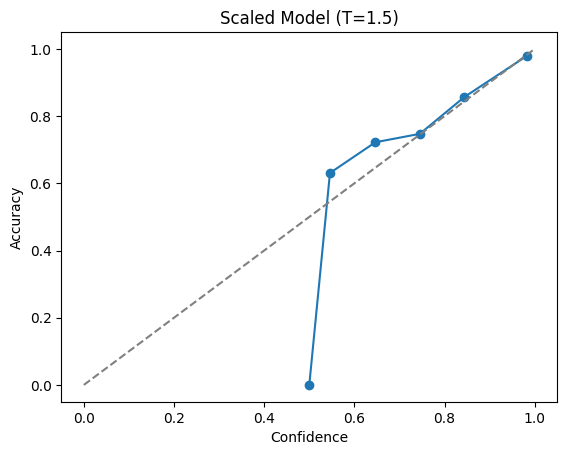

In [ ]:
import matplotlib.pyplot as plt

def plot_reliability_diagram(y_true, y_prob, title):
    confidences = np.max(y_prob, axis=1)
    predictions = np.argmax(y_prob, axis=1)
    bins = np.linspace(0, 1, 11)
    bin_accuracies = []
    bin_confidences = []
    for i in range(len(bins)-1):
        in_bin = (confidences > bins[i]) & (confidences <= bins[i+1])
        if np.sum(in_bin) > 0:
            bin_accuracies.append(np.mean((predictions == y_true)[in_bin]))
            bin_confidences.append(np.mean(confidences[in_bin]))
    plt.plot(bin_confidences, bin_accuracies, marker='o')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('Confidence')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.show()

plot_reliability_diagram(y_test, y_prob_original, 'Original Model')
plot_reliability_diagram(y_test, scaled_probs, 'Scaled Model (T=1.5)')

In [ ]:
X_test_ood = X_test.copy()
X_test_ood['Annual_Premium'] *= 1.2
y_prob_ood = pipeline.predict_proba(X_test_ood)
ece_ood = compute_ece(y_test, y_prob_ood)
scaled_probs_ood = temperature_scale(y_prob_ood, best_temp)
ece_ood_scaled = compute_ece(y_test, scaled_probs_ood)
print(f"ECE OOD Original: {ece_ood:.4f}, Scaled: {ece_ood_scaled:.4f}")

ECE OOD Original: 0.0455, Scaled: 0.0471


In [ ]:
#Robustness Verification

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import random

# --------------- Function to Add Noise ---------------
def add_noise(X, noise_level=0.05):
    X_noisy = X.copy()
    numeric_cols = X_noisy.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        noise = np.random.normal(0, noise_level * X_noisy[col].std(), size=X_noisy.shape[0])
        X_noisy[col] += noise
    return X_noisy

In [ ]:
def remove_random_samples(X, y, remove_fraction=0.1):
    # How many samples to remove
    num_samples_to_remove = int(remove_fraction * X.shape[0])

    # Randomly select indices to remove
    indices = np.random.choice(X.index, size=num_samples_to_remove, replace=False)

    # Drop those indices
    X_reduced = X.drop(index=indices)
    y_reduced = y.drop(index=indices)

    return X_reduced, y_reduced

In [ ]:
def evaluate_model(X_test_new, y_test, pipeline):
    y_pred = pipeline.predict(X_test_new)
    y_prob = pipeline.predict_proba(X_test_new)
    acc = accuracy_score(y_test, y_pred)
    ece = compute_ece(y_test.values, y_prob)
    return acc, ece

# --------------- Original Model Performance ---------------
print("---- Original ----")
acc_original, ece_original = evaluate_model(X_test, y_test, pipeline)
print(f"Accuracy: {acc_original:.4f}")
print(f"ECE: {ece_original:.4f}")

---- Original ----
Accuracy: 0.7850
ECE: 0.0430


In [ ]:
print("\n---- After Adding 5% Noise ----")
X_test_noisy = add_noise(X_test, noise_level=0.05)
acc_noisy, ece_noisy = evaluate_model(X_test_noisy, y_test, pipeline)
print(f"Accuracy with Noise: {acc_noisy:.4f}")
print(f"ECE with Noise: {ece_noisy:.4f}")


---- After Adding 5% Noise ----
Accuracy with Noise: 0.7800
ECE with Noise: 0.0353


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# --------------- Imputation for Numeric + Categorical ---------------
def impute_missing_values(X):
    # Separate column types
    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

    # Define imputers
    numeric_imputer = SimpleImputer(strategy='mean')
    categorical_imputer = SimpleImputer(strategy='most_frequent')

    # Define transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_imputer, numeric_cols),
            ('cat', categorical_imputer, categorical_cols)
        ]
    )

    # Fit and transform
    X_imputed = preprocessor.fit_transform(X)

    # Rebuild DataFrame with original column names
    X_imputed_df = pd.DataFrame(X_imputed, columns=numeric_cols + categorical_cols)

    # Reset index to ensure alignment with y
    X_imputed_df.reset_index(drop=True, inplace=True)

    return X_imputed_df

# --------------- Now Apply ---------------
X_test_imputed = impute_missing_values(X_test)

# Also reset y_test index to match
y_test = y_test.reset_index(drop=True)


In [ ]:
print("\n---- After Removing 10% Samples ----")
X_test_reduced_samples, y_test_reduced_samples = remove_random_samples(X_test_imputed, y_test, remove_fraction=0.1)

acc_reduced_samples, ece_reduced_samples = evaluate_model(X_test_reduced_samples, y_test_reduced_samples, pipeline)
print(f"Accuracy after removing samples: {acc_reduced_samples:.4f}")
print(f"ECE after removing samples: {ece_reduced_samples:.4f}")


---- After Removing 10% Samples ----
Accuracy after removing samples: 0.7833
ECE after removing samples: 0.0417


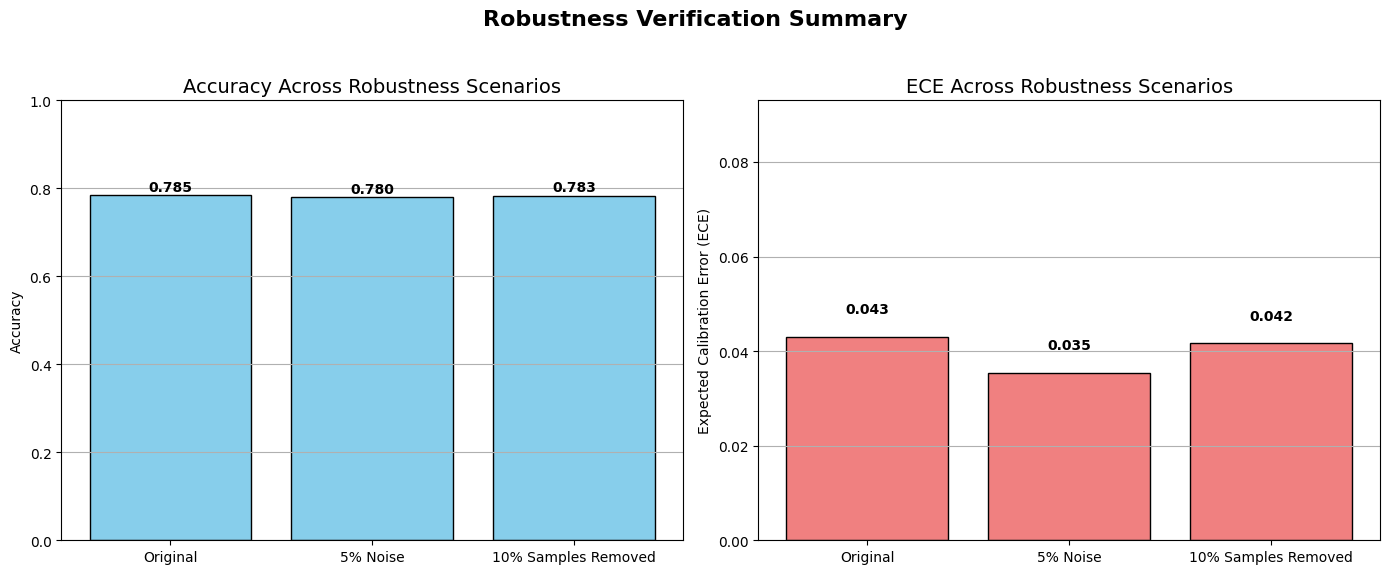

In [ ]:
import matplotlib.pyplot as plt

# Prepare data
scenarios = ['Original', '5% Noise', '10% Samples Removed']
accuracies = [acc_original, acc_noisy, acc_reduced_samples]
eces = [ece_original, ece_noisy, ece_reduced_samples]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy Bar Plot
axes[0].bar(scenarios, accuracies, color='skyblue', edgecolor='black')
axes[0].set_ylim(0, 1)
axes[0].set_title('Accuracy Across Robustness Scenarios', fontsize=14)
axes[0].set_ylabel('Accuracy')
axes[0].grid(axis='y')
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')

# ECE Bar Plot
axes[1].bar(scenarios, eces, color='lightcoral', edgecolor='black')
axes[1].set_ylim(0, max(eces) + 0.05)
axes[1].set_title('ECE Across Robustness Scenarios', fontsize=14)
axes[1].set_ylabel('Expected Calibration Error (ECE)')
axes[1].grid(axis='y')
for i, v in enumerate(eces):
    axes[1].text(i, v + 0.005, f"{v:.3f}", ha='center', fontweight='bold')

# Overall Title
plt.suptitle('Robustness Verification Summary', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
X.to_csv("sample_data.csv",index=False)

In [ ]:
!pip install streamlit pyngrok

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the prediction pipeline
pipeline = joblib.load('insurance_sell_prediction_pipeline.joblib')

# Load sample data to infer types and ranges
sample_data = pd.read_csv('/content/sample_data.csv')

numerical_columns = sample_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = sample_data.select_dtypes(include=['object']).columns.tolist()

def get_column_info(df):
    column_info = {}
    for col in df.columns:
        if col in numerical_columns:
            column_info[col] = {
                'dtype': df[col].dtype,
                'min': df[col].min(),
                'max': df[col].max()
            }
        elif col in categorical_columns:
            column_info[col] = {
                'dtype': df[col].dtype,
                'unique': df[col].unique().tolist()
            }
    return column_info

column_info = get_column_info(sample_data)

def predict_insurance(d):
    df = pd.DataFrame([d])

    # Add dummy 'id' column if missing
    if 'id' not in df.columns:
        df['id'] = 0

    pred = pipeline.predict(df)
    prob = np.max(pipeline.predict_proba(df))
    return pred[0], round(prob, 2)

# Streamlit UI
st.title("Insurance Sell Prediction")

user_input = {}
for col, info in column_info.items():
    if info['dtype'] in ['int64', 'float64']:
        user_input[col] = st.number_input(f"{col}", min_value=info['min'], max_value=info['max'], value=info['min'])
    else:
        user_input[col] = st.selectbox(f"{col}", options=info['unique'])

if st.button("Predict"):
    prediction, probability = predict_insurance(user_input)
    st.write(f'Prediction: {prediction}')
    st.write(f'Probability: {probability}')


Overwriting app.py


In [ ]:
from pyngrok import ngrok

ngrok_key = "2wPfVKktWmGD3kdwY6DIBN8xyAh_mFyk61fxMFZqw5tno4XG"
port = 8501

ngrok.set_auth_token(ngrok_key)
ngrok.connect(port).public_url

'https://3eb2-34-90-20-158.ngrok-free.app'

In [ ]:
!rm -rf logs.txt && streamlit run app.py &>/content/logs.txt